##### Esse modelo preditivo pretende traçar uma ligação entre informações de saúde e a maior probabilidade de um paciente desenvolver diabetes

In [98]:
#Importação das bibliotecas e do banco de dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("diabetes.csv")


In [99]:
#Verificando se os há valores nulos
df.isnull().values.any()
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [100]:
#Identificação de correlação entre as variáveis com um gráfico
def plot_corr(df, size = 10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
#Correlação não implica causalidade

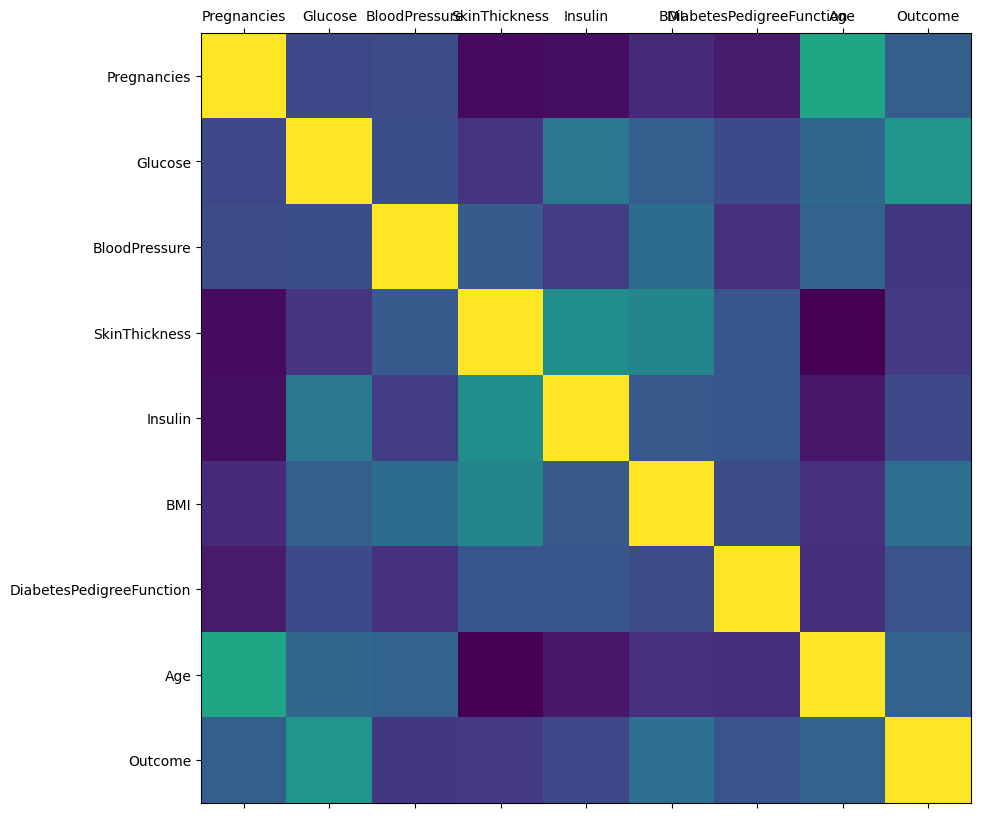

In [101]:
#Visualização do gráfico
plot_corr(df)
# +1 = forte correlação positiva
# 0 = nenhuma correlaçao
# -1 = forte correlação negativa

In [102]:
#Verificação se houveram mais casos de diabetes positivos ou negativos


# Verificando como os dados estão distribuídos
num_false = len(df.loc[df['Outcome'] == False])
num_true = len(df.loc[df['Outcome'] == True])
print('Número de casos positivos: {0} ({1:2.2f}%)'.format(num_true, (num_true/ (num_true + num_false)) * 100))
print('Número de casos negativos: {0} ({1:2.2f}%)'.format(num_false, (num_false/ (num_true + num_false)) * 100))



Número de casos positivos: 268 (34.90%)
Número de casos negativos: 500 (65.10%)


In [103]:
#Preparação pro treino
from sklearn.model_selection import train_test_split

In [104]:
#Variaveis preditoras
atributos_pred = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#Variável que será prevista
atributo_prev = ['Outcome']

In [105]:
#Criando objetos
X = df[atributos_pred].values
Y = df[atributo_prev].values

In [106]:
#Definindo taxa de divisão
split_test_size = 0.30 

#Dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [107]:
#Verificação da divisão
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 1]), 
                                               (len(df.loc[df['Outcome'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Outcome'] == 0]), 
                                               (len(df.loc[df['Outcome'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 1]), 
                                               (len(y_treino[y_treino[:] == 1])/len(y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(y_treino[y_treino[:] == 0]), 
                                               (len(y_treino[y_treino[:] == 0])/len(y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 1]), 
                                               (len(y_teste[y_teste[:] == 1])/len(y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(y_teste[y_teste[:] == 0]), 
                                               (len(y_teste[y_teste[:] == 0])/len(y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [108]:
# Verificando se existem valores nulos
df.isnull().values.any()
#Mesmo que não existam células realmente nulas no dataframe, válores como 0 são inválidos


False

In [109]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['Age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


In [110]:
#Tratamento de valores inválidos
from sklearn.impute import SimpleImputer

In [111]:
# Criando objeto
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")

# Substituindo os valores iguais a zero, pela média dos dados
x_treino = preenche_0.fit_transform(x_treino)
x_teste = preenche_0.fit_transform(x_teste)

In [112]:
#Criação do modelo de aprendizado
from sklearn.naive_bayes import GaussianNB

In [113]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [114]:
# Treinando o modelo
modelo_v1.fit(x_treino, y_treino.ravel())

GaussianNB()

In [115]:
#Verificando a exatidão do modelo nos dados de treino
from sklearn import metrics

nb_predict_train = modelo_v1.predict(x_treino)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, nb_predict_train)))
print()



Exatidão (Accuracy): 0.7542



In [116]:
#Verificando a exatidão do modelo nos dados de teste
nb_predict_test = modelo_v1.predict(x_teste)

print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, nb_predict_test)))
print()


Exatidão (Accuracy): 0.7359



In [117]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [118]:
#Otimizando o modelo com RandomForest
from sklearn.ensemble import RandomForestClassifier

modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())


RandomForestClassifier(random_state=42)

In [119]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))


# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, rf_predict_test)))
print()



Exatidão (Accuracy): 1.0000
Exatidão (Accuracy): 0.7403



In [120]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_teste, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 32 119]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [121]:
#Regressão logística
from sklearn.linear_model import LogisticRegression

# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_teste)



In [122]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.7359

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



#### Exatidão nos dados de teste

##### Modelo usando algoritmo Naive Bayes = 0.7359
##### Modelo usando algoritmo Random Forest = 0.7400
##### Modelo usando algoritmo Regressão Logística = 0.7446

In [123]:
# Fazendo previsões
import pickle

# Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))


In [125]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(x_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(x_teste[18].reshape(1, -1))
# Previsão se as pessoas com índices 15 e 18 terão diabetes

print(resultado1)
print(resultado2)
# A primeira pessoa provavelmente não terá, mas a segunda terá

[0]
[1]
